## **QUESTION 2 - BACK PROPOGATION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
d = load_iris()

In [ ]:
X = d.data
df = pd.DataFrame(X)
df.shape

(150, 4)

In [ ]:
df.columns = ['X1', 'X2', 'X3', 'X4']
df.head()

,X1,X2,X3,X4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
Y = d.target
Y = pd.get_dummies(Y).values

In [ ]:
df[['Y1', 'Y2', 'Y3']] = Y
df.head()

,X1,X2,X3,X4,Y1,Y2,Y3
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
X_train.shape

(105, 4)

In [ ]:
def activation(_in):
    return 1 / (1 + np.exp(-_in))

In [ ]:
def error(y, y_pred):
    return np.mean((y - y_pred)**2)

In [ ]:
def accuracy(y, y_pred):
    acc = 0
    for i in range(len(y)):
        if np.argmax(y[i]) == np.argmax(y_pred[i]):
            acc += 1
    
    return acc / len(y)

In [ ]:
def backpropogation(X_train, Y_train, alpha = 1, n_epochs = 300):
    v = np.random.normal(size = (4,2))
    w = np.random.normal(size = (2,3))
    err = []
    acc = []
    for _ in range(n_epochs):
        # FORWARD PASS
        Z_in = np.dot(X_train, v)
        Z_hat = activation(Z_in)

        Y_in = np.dot(Z_hat, w)
        Y_pred = activation(Y_in)

        err.append(error(Y_train, Y_pred))
        acc.append(accuracy(Y_train, Y_pred))

        # BACKWARD PASS
        dy = -2 * (Y_train - Y_pred) * Y_pred * (1 - Y_pred)
        dw = np.dot(np.transpose(Z_hat), dy)
        w += (-alpha * dw)

        dz = -2 * np.dot(dy, np.transpose(w)) * Z_hat * (1 - Z_hat)
        dv = np.dot(np.transpose(X_train), dz)
        v += (-alpha * dv)

    return v, w, err, acc

In [ ]:
n = 300
v, w, errors, acc = backpropogation(X_train, Y_train, 1, n)

<ipython-input-10-78365de536f3>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-_in))


In [ ]:
print(f"AT START, ERROR = {round(errors[0],3)} AND ACCURACY = {100*round(acc[0],3)}")
print(f"AT END, ERROR = {round(errors[-1],3)} AND ACCURACY = {100*round(acc[-1],3)}")

AT START, ERROR = 0.364 AND ACCURACY = 35.199999999999996
AT END, ERROR = 0.25 AND ACCURACY = 35.199999999999996


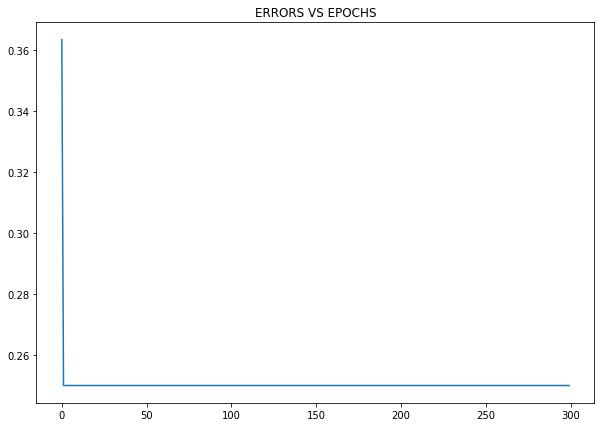

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(list(range(n)), errors)
plt.title("ERRORS VS EPOCHS")
plt.show()

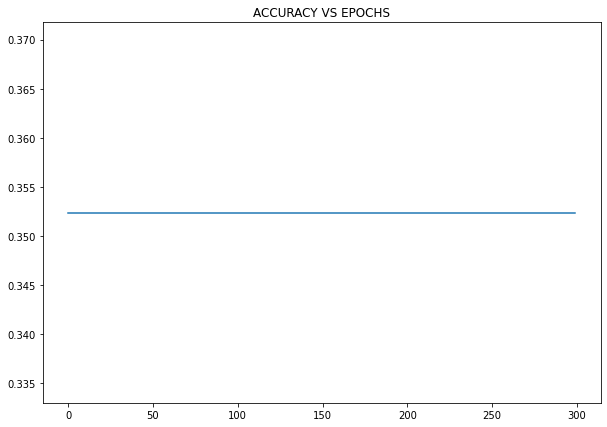

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(list(range(n)), acc)
plt.title("ACCURACY VS EPOCHS")
plt.show()

In [ ]:
def backpropagation_test(X_test, y_test, weights):
    v = weights[0]
    w = weights[1]
    
    Zin = np.dot(X_test, v)
    z_hat = activation(Zin)

    Yin = np.dot(z_hat, w)
    y_hat = activation(Yin)
    
    errors = error(y_test, y_hat)
    acc = accuracy(y_test, y_hat)
    print(f"ERROR = {round(errors,3)} AND ACCURACY = {100*round(acc,3)}")

In [ ]:
backpropagation_test(X_test, Y_test, [v, w])

ERROR = 0.25 AND ACCURACY = 28.9


<ipython-input-10-78365de536f3>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-_in))
